In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
train_dir ="/content/drive/My Drive/dataset/train/"
test_dir="/content/drive/My Drive/dataset/test/"

In [ ]:

def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
print(train_samples)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print("Classes",num_classes)
print("Train images",train_samples)
print("Test images",test_samples)

18148
Classes 19
Train images 18148
Test images 4830


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(img_width,img_height), batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 18148 images belonging to 19 classes.
Found 4829 images belonging to 19 classes.


In [ ]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Rice__BrownSpot': 5,
 'Rice__Hispa': 6,
 'Rice__LeafBlast': 7,
 'Rice__healthy': 8,
 'Tomato_Bacterial_spot': 9,
 'Tomato_Early_blight': 10,
 'Tomato_Late_blight': 11,
 'Tomato_Leaf_Mold': 12,
 'Tomato_Septoria_leaf_spot': 13,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 14,
 'Tomato__Target_Spot': 15,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 16,
 'Tomato__Tomato_mosaic_virus': 17,
 'Tomato_healthy': 18}

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         


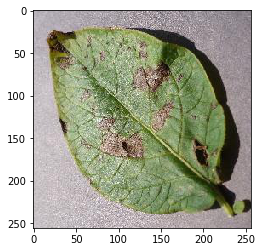

In [ ]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/dataset/train/Potato___Early_blight/0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.JPG')
plt.imshow(img1);
#preprocess image


In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,nb_epoch=1,steps_per_epoch=train_generator.samples//batch_size,validation_data=validation_generator,nb_val_samples=validation_generator.samples // batch_size,verbose=1)

Found 18148 images belonging to 19 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=567, validation_data=<keras_pre..., verbose=1, epochs=1, validation_steps=567)`
  import sys




Epoch 1/1





567/567 [==============================] - 5263s 9s/step - loss: 1.5133 - acc: 0.5051 - val_loss: 0.8150 - val_acc: 0.7163


In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:
print(model.history.keys())
#import matplotlib.pyplot as plt
#x=epochs
#y=accuracy
# summarize history for accuracy
history = model.fit(x, y)
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:
from keras.models import load_model
model.save('diag.h5')

In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("diag.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:


Classes = ["Pepper__bell___Bacterial_spot","Pepper__bell___healthy","Potato___Early_blight",
           "Potato___healthy","Potato___Late_blight","Rice__BrownSpot","Rice__healthy","Rice__Hispa",
           "Rice__LeafBlast","Tomato__Target_Spot","Tomato__Tomato_mosaic_virus","Tomato__Tomato_YellowLeaf__Curl_Virus",
           "Tomato_Bacterial_spot","Tomato_Early_blight","Tomato_healthy","Tomato_Late_blight","Tomato_Leaf_Mold",
           "Tomato_Septoria_leaf_spot","Tomato_Spider_mites_Two_spotted_spider_mite"]

In [ ]:
from keras.models import load_model
model=load_model('diag.h5')

ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
img_width=256
img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/My Drive/90.jpg')])
disease=image.load_img('/content/drive/My Drive/90.jpg')
plt.imshow(disease)
print (Classes[int(result)])

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Tomato_Early_blight


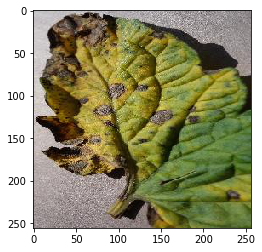

In [ ]:
result = model.predict_classes([prepare('/content/drive/My Drive/10.JPG')])
disease=image.load_img('/content/drive/My Drive/10.JPG')
plt.imshow(disease)
print (Classes[int(result)])


In [ ]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model_file('/content/diag.h5')
tfmodel = converter.convert()
open("model.tflite","wb").write(tfmodel)



ValueError: ignored

In [ ]:
from tensorflow import lite
print(lite.__version__)
converter = lite.TFLiteConverter.from_keras_model_file( '/content/samp.h5' ) 
model = converter.convert()
file = open( 'output.tflite' , 'wb' ) 
file.write( model )

AttributeError: ignored

from tensorflow import lite
converter = lite.TFLiteConverter